# LOAN PREDICTION

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Origen de dato del dataset
df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/train.csv")

In [75]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(614, 13)

In [76]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [78]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
# Estadísticas descriptivas de columnas categóricas
df.describe(include=['object'])  # Muestra estadísticas descriptivas (conteo, valores únicos, categoría más frecuente) para variables categóricas.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [81]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [83]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(0)

In [84]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

object     8
float64    4
int64      1
Name: count, dtype: int64

In [85]:
# Distribución de valores en columnas categóricas
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [86]:
df['Credit_History'] = df['Credit_History'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>]], dtype=object)

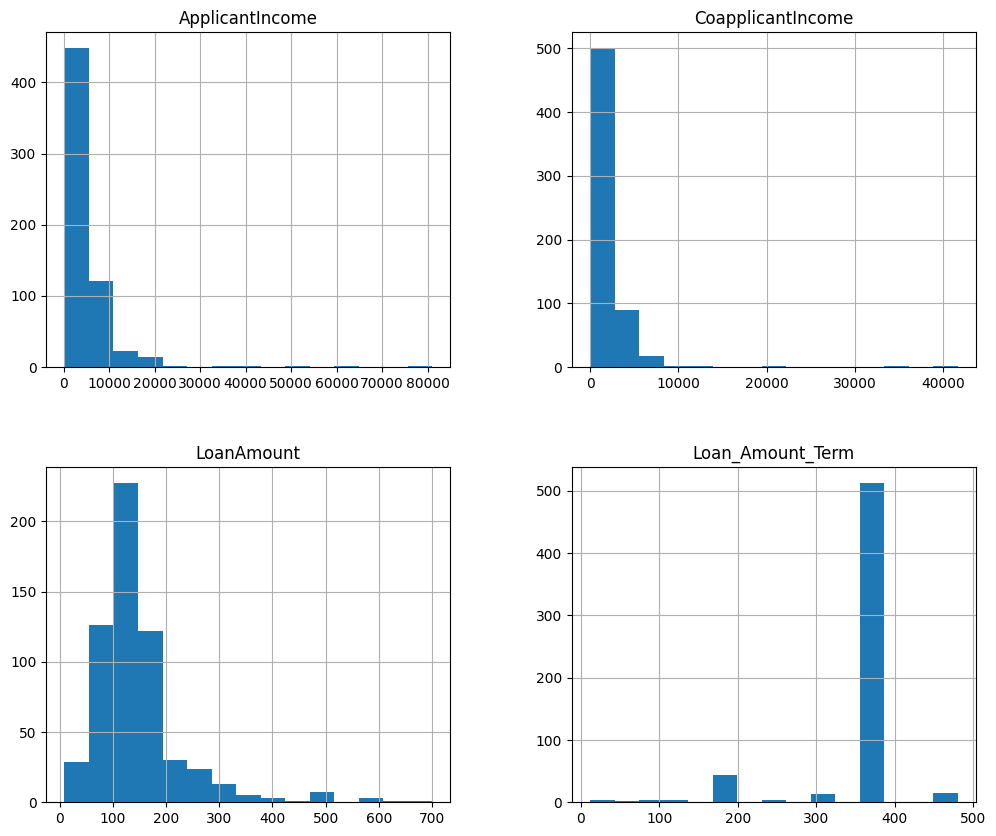

In [87]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

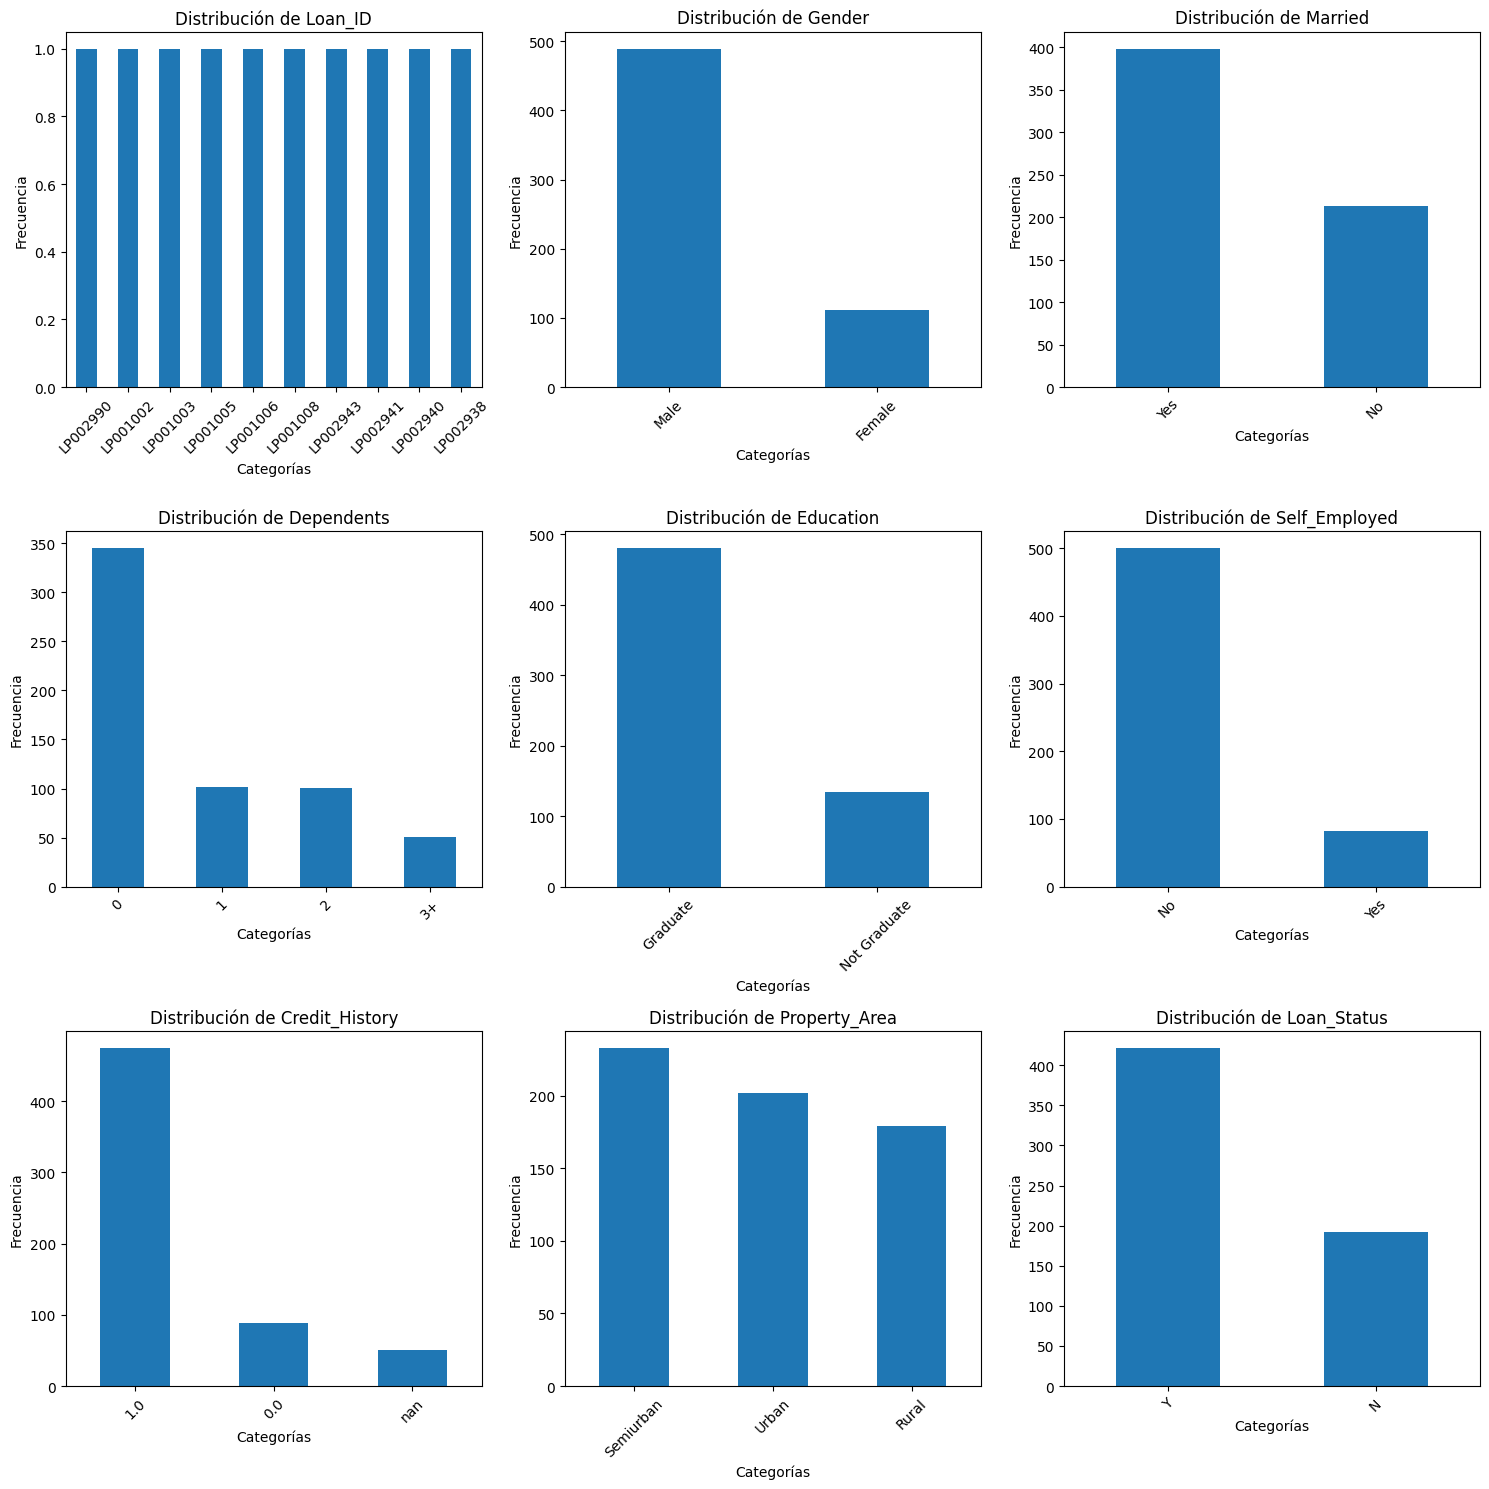

In [88]:
# Graficar la distribución de las columnas categoricas

# Seleccionar las columnas categóricas del DataFrame
categorical_columns = df.select_dtypes(include='object').columns

# Definir el tamaño de la figura y el layout de los subplots
num_columns = 3  # Número de columnas de subplots en cada fila
nrows = int(np.ceil(len(categorical_columns) / num_columns))  # Calcula el número de filas necesarias

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=num_columns, figsize=(15, nrows * 5))

# Aplanar los ejes en caso de que haya múltiples filas y columnas
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generar gráficos de barras en cada subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Seleccionar el eje correspondiente
    df[column].value_counts().nlargest(10).plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas

# Eliminar subplots vacíos si hay menos columnas categóricas que subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes no utilizados

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()

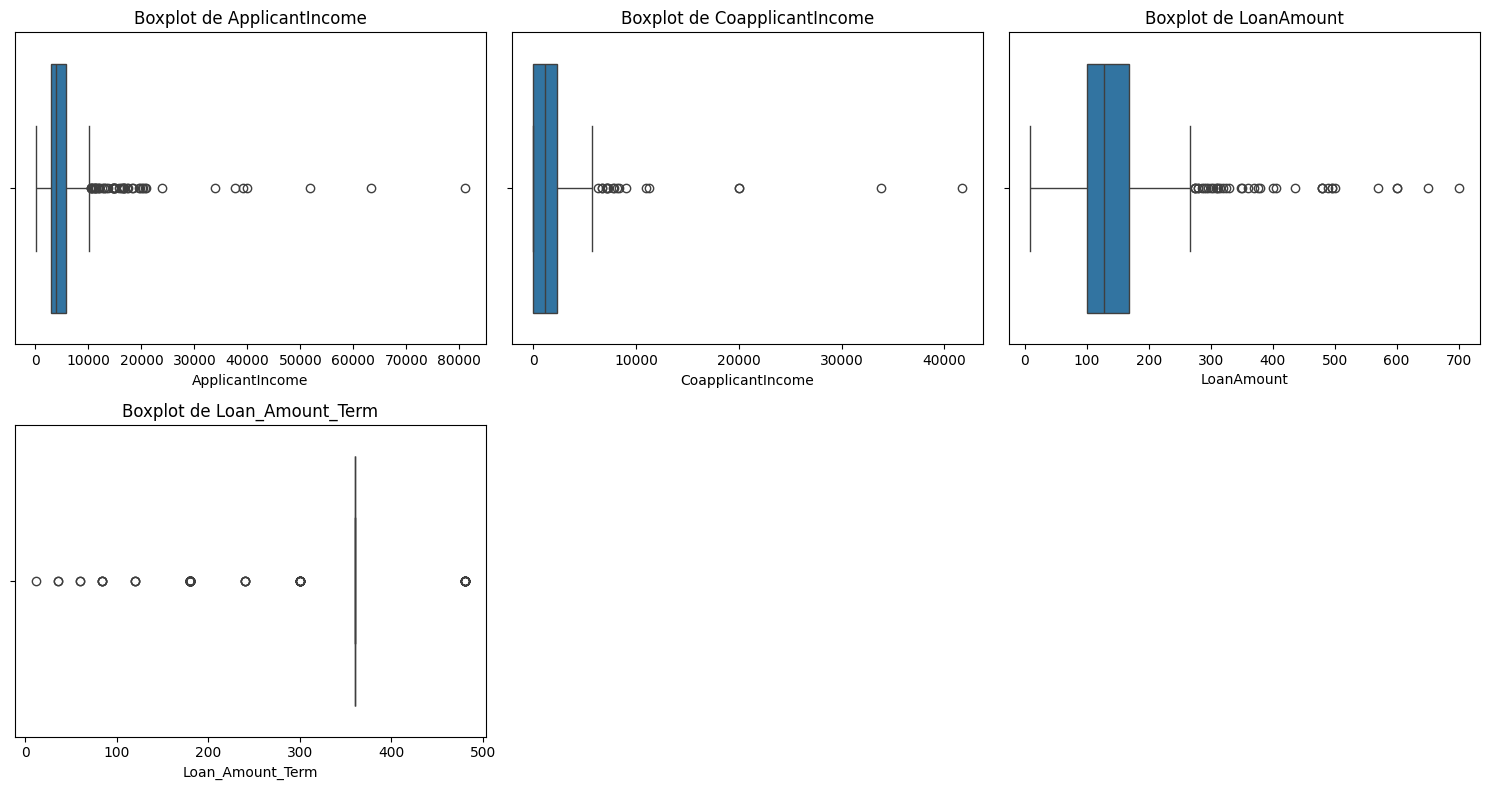

In [89]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [90]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")


ApplicantIncome - Número de outliers: 50

CoapplicantIncome - Número de outliers: 18

LoanAmount - Número de outliers: 39

Loan_Amount_Term - Número de outliers: 88


In [91]:
# Eliminar los outliers de todas las columnas numéricas
def eliminar_outliers_todas_columnas(df):
    # Copiar el DataFrame original para mantener el original sin cambios
    df_sin_outliers = df.copy()
    
    # Seleccionar las columnas numéricas
    columnas_numericas = df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns
    
    # Crear un DataFrame booleano para identificar filas con valores dentro de los límites de outliers
    condiciones = pd.DataFrame(True, index=df_sin_outliers.index, columns=columnas_numericas)
    
    # Iterar sobre cada columna numérica
    for columna in columnas_numericas:
        # Calcular el primer y tercer cuartil, y el rango intercuartil (IQR)
        Q1 = df_sin_outliers[columna].quantile(0.25)
        Q3 = df_sin_outliers[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Actualizar la condición para la columna actual
        condiciones[columna] = (df_sin_outliers[columna] >= lower_bound) & (df_sin_outliers[columna] <= upper_bound)
    
    # Combinar todas las condiciones para filtrar las filas sin outliers
    df_sin_outliers = df_sin_outliers[condiciones.all(axis=1)]
    
    return df_sin_outliers


# Ejecutar la función para obtener el DataFrame sin outliers en todas las columnas numéricas
df_sin_outliers = eliminar_outliers_todas_columnas(df)

# Verificar la cantidad de filas antes y después de la limpieza
print(f"DataFrame original: {df.shape}")
print(f"DataFrame sin outliers: {df_sin_outliers.shape}")

# Calcular y mostrar la diferencia de filas
diferencia_filas = df.shape[0] - df_sin_outliers.shape[0]
print(f"Diferencia de filas eliminadas: {diferencia_filas}")

# Reemplazar dataset para continuar el análisis
df = df_sin_outliers


DataFrame original: (614, 13)
DataFrame sin outliers: (430, 13)
Diferencia de filas eliminadas: 184


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# Separar las características y la columna objetivo
X = df.drop(columns=['Loan_Status'])  # 'Loan_Status' es la columna objetivo
y = df['Loan_Status']  # Definir la columna objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar las columnas numéricas y categóricas del dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocesar las columnas numéricas: imputación de valores faltantes y escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocesar las columnas categóricas: codificación one-hot para variables categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combinar transformaciones en un preprocesador
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),  # Transformaciones para columnas numéricas
    ('cat', categorical_transformer, categorical_features)  # Transformaciones para columnas categóricas
])

# Codificar las etiquetas de la variable objetivo
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Codifica 'Y' como 1 y 'N' como 0
y_test_encoded = label_encoder.transform(y_test)  # Aplica la misma codificación al conjunto de prueba


In [93]:
# LGBM clasificación sin ajuste de hiperparametros

# Crear un pipeline que incluye el preprocesador y el modelo LightGBM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', lgb.LGBMClassifier(
        random_state=42,           # Semilla para resultados reproducibles
        n_estimators=100,          # Número de árboles
        learning_rate=0.1,         # Tasa de aprendizaje
        max_depth=5,               # Profundidad máxima de los árboles
        num_leaves=31              # Número de hojas en los árboles
    ))
])

# Ajustar el modelo al conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicciones binarias (0/1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)


[LightGBM] [Info] Number of positive: 251, number of negative: 93
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.729651 -> initscore=0.992853
[LightGBM] [Info] Start training from score 0.992853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

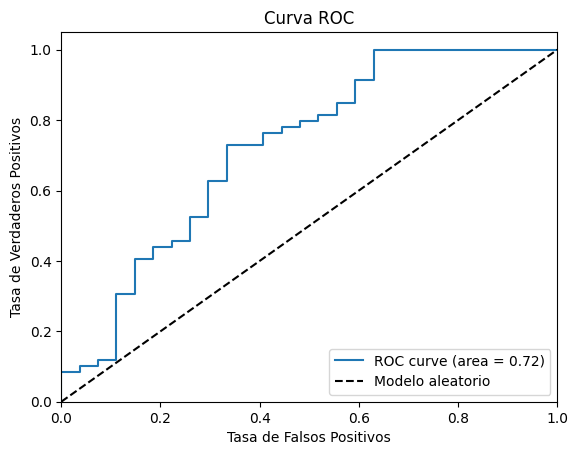

In [94]:
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()



In [95]:
# LGBM con Grid Search

# Crear un pipeline que incluye el preprocesador y el modelo LightGBM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', lgb.LGBMClassifier(random_state=42))  # Modelo LightGBM
])

# Definir la búsqueda de hiperparámetros para el modelo LightGBM
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Número de árboles
    'model__learning_rate': [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    'model__max_depth': [3, 5, 7],  # Profundidad máxima de los árboles
    'model__num_leaves': [20, 31, 50]  # Número de hojas en los árboles
}

# Ajustar el modelo con GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)  # Predicciones binarias (0/1)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 251, number of negative: 93
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.729651 -> initscore=0.992853
[LightGBM] [Info] Start training from score 0.992853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

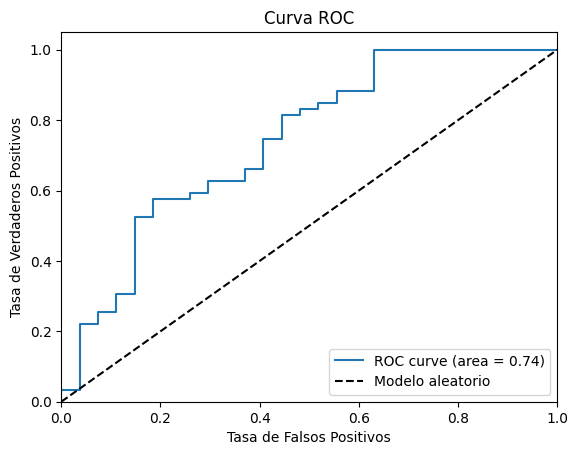

In [96]:
# Generar la curva ROC y calcular el AUC
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [97]:
# SVM clasificación sin ajuste de hiperparametros

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear un pipeline que incluye el preprocesador y el modelo LightGBM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', SVC(kernel='linear', probability=True, random_state=42))
])

# Ajustar el modelo al conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicciones binarias (0/1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Exactitud: 0.7906976744186046
Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.91      0.37      0.53        27
           Y       0.77      0.98      0.87        59

    accuracy                           0.79        86
   macro avg       0.84      0.68      0.70        86
weighted avg       0.82      0.79      0.76        86

Matriz de Confusión:
[[10 17]
 [ 1 58]]


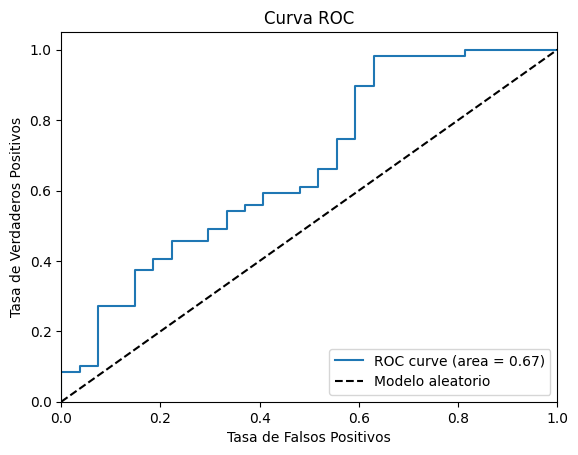

In [98]:
# Generar la curva ROC y calcular el AUC
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [99]:
# SVM con optimización de GridSearch

# Crear un pipeline que incluye el preprocesador y el modelo SVC
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', SVC(kernel='linear', probability=True, random_state=42))  # Modelo SVC
])

# Definir la búsqueda de hiperparámetros para el modelo SVC
param_grid = {
    'model__C': [0.1, 1, 10],  # Valores del parámetro de regularización
    'model__kernel': ['linear', 'rbf'],  # Tipos de kernel
    'model__gamma': ['scale', 'auto']  # Métodos para calcular el coeficiente gamma
}

# Ajustar el modelo con GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado en el conjunto de prueba
y_pred = best_model.predict(X_test)  # Predicciones binarias (0/1)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}')

# Mostrar métricas detalladas del modelo
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Exactitud del modelo: 0.7906976744186046
Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.91      0.37      0.53        27
           Y       0.77      0.98      0.87        59

    accuracy                           0.79        86
   macro avg       0.84      0.68      0.70        86
weighted avg       0.82      0.79      0.76        86

Matriz de Confusión:
[[10 17]
 [ 1 58]]


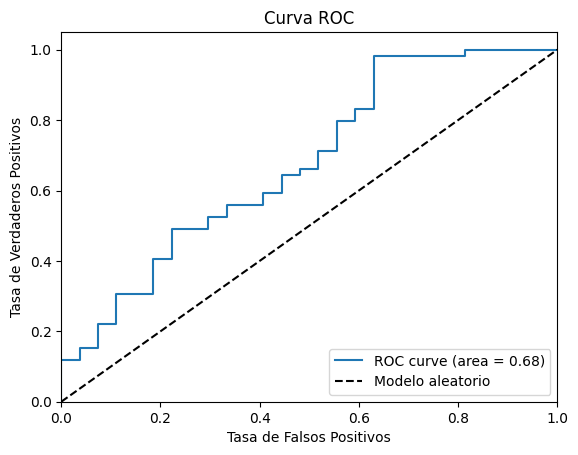

In [100]:
# Generar la curva ROC y calcular el AUC
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [106]:
import xgboost as xgb

# Crear un pipeline que incluye el preprocesador y el modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', lgb.LGBMClassifier(random_state=42))
])

# Ajustar el modelo al conjunto de entrenamiento
pipeline.fit(X_train, y_train_encoded)

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicciones binarias (0/1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
print('Informe de Clasificación:')
print(classification_report(y_test_encoded, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

[LightGBM] [Info] Number of positive: 251, number of negative: 93
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.729651 -> initscore=0.992853
[LightGBM] [Info] Start training from score 0.992853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

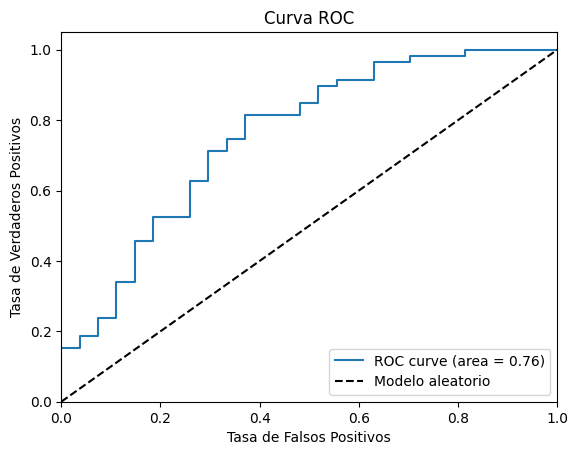

In [107]:
# Generar la curva ROC y calcular el AUC para clasificaciones binarias
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [108]:
#XGBoost optimizado con Grid Search

# Crear un pipeline que incluye el preprocesador y el modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', xgb.XGBClassifier(random_state=42))  # Modelo XGBoost
])

# Definir la búsqueda de hiperparámetros para el modelo XGBoost
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Número de árboles
    'model__learning_rate': [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    'model__max_depth': [3, 5, 7],  # Profundidad máxima de los árboles
    'model__subsample': [0.8, 0.9, 1.0],  # Proporción de muestras para cada árbol
    'model__colsample_bytree': [0.8, 0.9, 1.0]  # Proporción de características para cada árbol
}

# Ajustar el modelo con GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_encoded)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)  # Predicciones binarias (0/1)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
print('Informe de Clasificación:')
print(classification_report(y_test_encoded, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Exactitud: 0.7441860465116279
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.44      0.52        27
           1       0.78      0.88      0.83        59

    accuracy                           0.74        86
   macro avg       0.70      0.66      0.67        86
weighted avg       0.73      0.74      0.73        86

Matriz de Confusión:
[[12 15]
 [ 7 52]]
